# GoW_novedad!
## El propósito de este notebook es doble: (1) entregar una noción medible de "novedad"; y (2) medir esta novedad en las distintas partes de un grafo $G$, desde la m

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import spacy
nlp = spacy.load('en')
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk import word_tokenize
import numpy as np
import re
import pickle
import powerlaw
import string
import operator
import itertools
import community
import json
import statistics
from collections import Counter
import numpy.linalg as la
import scipy.cluster.vq as vq
import random
from collections import Counter

In [2]:
#########################################################################################################################
############################################### progress bar ############################################################
#########################################################################################################################
################################# https://github.com/alexanderkuk/log-progress ##########################################
#########################################################################################################################
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

### Descripción de los grafos por año
#### Los grafos están construidos utilizando únicamente sustantivos (comunes y propios) y con co-ocurrencia dentro de una oración. Se utilizaron 2080 introducciones de la revista Cell y 1644 introducciones de la revista Neuron. 

### cell

In [3]:
keys_doi=['2010','2011','2012','2013','2014','2015','2016']

In [4]:
graphs_cell = pickle.load(open( 'graphs_cell.p', 'rb' ) )

In [5]:
for key in keys_doi:
    G=graphs_cell[key]
    print(key)
    print('nodes: '+str(len(G.nodes)))
    print('edges: '+str(len(G.edges)))
    print('average degree: '+str(sum(dict(nx.degree(G,weight='weight')).values())/float(len(G.nodes))))
    print('max degree: '+str(max(dict(nx.degree(G,weight='weight')).values())))
    core_number=nx.core_number(G)
    print('max core number: '+str(max(core_number.values())))
    main_core=nx.k_core(G,max(core_number.values()))
    print('main core size: '+str(len(main_core)))
    main_crust=nx.k_crust(G,max(core_number.values())-1)
    print('main crust size: '+str(len(main_crust)))
    print('average clustering (weighted): ' +str(nx.average_clustering(G,weight='weight')))
    print('average clustering (unweighted): ' +str(nx.average_clustering(G)))

2010
nodes: 3929
edges: 82926
average degree: 8.812420463222193
max degree: 948.9999999999993
max core number: 69
main core size: 241
main crust size: 3688
average clustering (weighted): 0.008651815903376553
average clustering (unweighted): 0.6962652274852223
2011
nodes: 4238
edges: 97075
average degree: 9.598395469561112
max degree: 1124.9999999999952
max core number: 80
main core size: 204
main crust size: 4034
average clustering (weighted): 0.006002028745705114
average clustering (unweighted): 0.6964000001174
2012
nodes: 4905
edges: 120198
average degree: 10.778797145769618
max degree: 1431.999999999988
max core number: 92
main core size: 254
main crust size: 4651
average clustering (weighted): 0.004905233957562572
average clustering (unweighted): 0.70302746311483
2013
nodes: 4801
edges: 115730
average degree: 10.442824411580915
max degree: 1308.9999999999882
max core number: 87
main core size: 297
main crust size: 4504
average clustering (weighted): 0.004766834023428822
average clu

### neuron

In [5]:
keys_doi_neuron=['2010','2011','2012','2013','2014','2015','2016']

In [6]:
graphs_neuron = pickle.load(open( 'graphs_neuron.p', 'rb' ) )

In [9]:
for key in keys_doi_neuron:
    G=graphs_neuron[key]
    print(key)
    print('nodes: '+str(len(G.nodes)))
    print('edges: '+str(len(G.edges)))
    print('average degree '+str(sum(dict(nx.degree(G,weight='weight')).values())/float(len(G.nodes))))
    print('max degree '+str(max(dict(nx.degree(G,weight='weight')).values())))
    core_number=nx.core_number(G)
    print('max core number '+str(max(core_number.values())))
    main_core=nx.k_core(G)
    print('main core size: '+str(len(main_core)))
    main_crust=nx.k_crust(G,max(core_number.values())-1)
    print('main crust size: '+str(len(main_crust)))
    print('average clustering (weighted): ' +str(nx.average_clustering(G,weight='weight')))
    print('average clustering (unweighted): ' +str(nx.average_clustering(G)))

2010
nodes: 2926
edges: 66771
average degree 9.254613807245384
max degree 648.0000000000022
max core number 68
main core size: 154
main crust size: 2772
average clustering (weighted): 0.011637414367337312
average clustering (unweighted): 0.6792722561905149
2011
nodes: 3711
edges: 94625
average degree 11.043923470762598
max degree 1011.0000000000001
max core number 82
main core size: 189
main crust size: 3522
average clustering (weighted): 0.006994381004510983
average clustering (unweighted): 0.6877224510478903
2012
nodes: 3398
edges: 83179
average degree 10.354914655679812
max degree 668.0000000000034
max core number 79
main core size: 194
main crust size: 3204
average clustering (weighted): 0.011235996898990892
average clustering (unweighted): 0.690114194538389
2013
nodes: 3634
edges: 87956
average degree 10.56301596037424
max degree 899.0000000000022
max core number 79
main core size: 226
main crust size: 3408
average clustering (weighted): 0.007936063665687316
average clustering (un

## k shell decomposition by year

### cell

In [10]:
decomposition_cell={} 
    
for key in log_progress(keys_doi_neuron, every=1):
    G=graphs_cell[key]
    k_max_core=nx.k_core(G)
    k_crust=nx.k_crust(G)
    ## giant connected component
    Gcc = sorted(nx.connected_component_subgraphs(k_crust), key=len, reverse=True)
    G0 = Gcc[0]
    decomposition_cell[key]=[k_max_core,G0,Gcc[1:]]

A Jupyter Widget

In [11]:
pickle.dump(decomposition_cell,open('decomposition_cell.p','wb'))

### neuron

In [12]:
decomposition_neuron={} 
    
for key in log_progress(keys_doi_neuron, every=1):
    G=graphs_neuron[key]
    k_max_core=nx.k_core(G)
    k_crust=nx.k_crust(G)
    ## giant connected component
    Gcc = sorted(nx.connected_component_subgraphs(k_crust), key=len, reverse=True)
    G0 = Gcc[0]
    decomposition_neuron[key]=[k_max_core,G0,Gcc[1:]]

A Jupyter Widget

In [13]:
pickle.dump(decomposition_neuron,open('decomposition_neuron.p','wb'))

## decomposition description

In [7]:
decomposition_cell = pickle.load(open('decomposition_cell.p', 'rb')) 
text_cell = pickle.load(open('text_cell.p', 'rb'))

In [8]:
decomposition_neuron = pickle.load(open('decomposition_neuron.p', 'rb')) 
text_neuron = pickle.load(open('text_neuron.p', 'rb'))

In [9]:
for key in decomposition_cell.keys():
    decomposition_cell[key][2]=nx.compose_all(decomposition_cell[key][2])

In [10]:
for key in decomposition_neuron.keys():
    decomposition_neuron[key][2]=nx.compose_all(decomposition_neuron[key][2])

In [11]:
main_core_cell={}
giant_cell={}
isolated_cell={}

for key in decomposition_cell.keys():
    main_core_cell[key]=decomposition_cell[key][0]
    giant_cell[key]=decomposition_cell[key][1]
    isolated_cell[key]=decomposition_cell[key][2]

In [12]:
main_core_neuron={}
giant_neuron={}
isolated_neuron={}
    
for key in decomposition_neuron.keys():
    main_core_neuron[key]=decomposition_neuron[key][0]
    giant_neuron[key]=decomposition_neuron[key][1]
    isolated_neuron[key]=decomposition_neuron[key][2]

### Palabras distintas
#### En esta mini sección analizamos la evolución de las palabras distintas. Para esto, a medida que avanza el tiempo desde el 2010 acumulamos las palabras asociadas a los nodos de cada división de $G$. Es decir, dado un conjunto de nodos (palabras) acumulamos todas las apariciones de estos nodos en el corpus de un año en particular. Con respecto a este conjunto de palabras acumuladas, se identifica las palabras únicas acumuladas. Se puede hipotetizar entonces que la tasa de palabras distintas acumuladas será mayor para las capas más externas de $G$. 

In [13]:
def NTvsT(decomposition,words_text): 
    cumulated_words_core=[]
    words_dict_core={}
    
    for k in sorted(decomposition.keys()):
        words=words_text[k]
        core_words=list(decomposition[k].nodes())
        
        words=[item for sublist in words for item in sublist if item in core_words]
        cumulated_words_core+=words
        
        total_words=len(cumulated_words_core)
        total_diff=len(list(set(cumulated_words_core)))
        largest = max(nx.connected_components(decomposition[k]), key=len)
        words_dict_core[k]=[total_words,total_diff,len(core_words),nx.number_connected_components(decomposition[k]),len(largest),len(largest)/float(len(decomposition[k]))]
    
    return words_dict_core

In [14]:
dict_graph_cell=NTvsT(graphs_cell, text_cell)

In [15]:
dict_main_core_cell=NTvsT(main_core_cell, text_cell)

In [16]:
dict_graph_neuron=NTvsT(graphs_neuron, text_neuron)

In [17]:
dict_main_core_neuron=NTvsT(main_core_neuron, text_neuron)

In [18]:
dict_giant_cell=NTvsT(giant_cell, text_cell)

In [19]:
dict_giant_neuron=NTvsT(giant_neuron, text_neuron)

In [20]:
dict_isolated_cell=NTvsT(isolated_cell, text_cell)

In [21]:
dict_isolated_neuron=NTvsT(isolated_neuron, text_neuron)

In [22]:
keys=[int(k) for k in keys_doi]

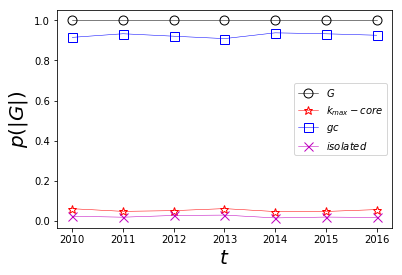

In [184]:
plt.plot(keys,[1 for k in keys],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[x/float(len(graphs_cell[str(y)])) for x,y in zip(list(zip(*dict_main_core_cell.values()))[2],keys)],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[x/float(len(graphs_cell[str(y)])) for x,y in zip(list(zip(*dict_giant_cell.values()))[2],keys)],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[x/float(len(graphs_cell[str(y)])) for x,y in zip(list(zip(*dict_isolated_cell.values()))[2],keys)],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$p(|G|)$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('size_cell.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

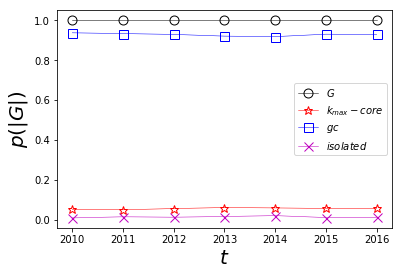

In [185]:
plt.plot(keys,[1 for k in keys],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[x/float(len(graphs_neuron[str(y)])) for x,y in zip(list(zip(*dict_main_core_neuron.values()))[2],keys)],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[x/float(len(graphs_neuron[str(y)])) for x,y in zip(list(zip(*dict_giant_neuron.values()))[2],keys)],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[x/float(len(graphs_neuron[str(y)])) for x,y in zip(list(zip(*dict_isolated_neuron.values()))[2],keys)],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$p(|G|)$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('size_neuron.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

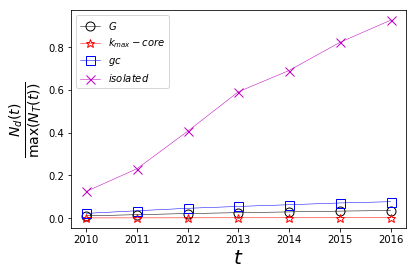

In [25]:
plt.plot(keys,[x/float(max(list(list(zip(*dict_graph_cell.values()))[0]))) for x in list(list(zip(*dict_graph_cell.values()))[1])],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[x/float(max(list(list(zip(*dict_main_core_cell.values()))[0]))) for x in list(list(zip(*dict_main_core_cell.values()))[1])],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[x/float(max(list(list(zip(*dict_giant_cell.values()))[0]))) for x in list(list(zip(*dict_giant_cell.values()))[1])],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[x/float(max(list(list(zip(*dict_isolated_cell.values()))[0]))) for x in list(list(zip(*dict_isolated_cell.values()))[1])],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\frac{N_d(t)}{\max(N_T(t))}$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('Ndvst_cell.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

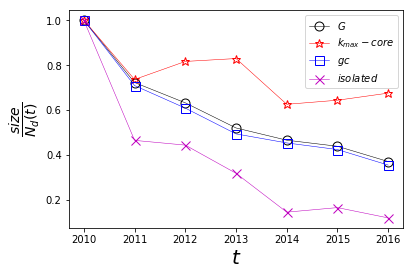

In [26]:
plt.plot(keys,[y/float(x) for x,y in zip(list(list(zip(*dict_graph_cell.values()))[1]),list(list(zip(*dict_graph_cell.values()))[2]))],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[y/float(x) for x,y in zip(list(list(zip(*dict_main_core_cell.values()))[1]),list(list(zip(*dict_main_core_cell.values()))[2]))],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[y/float(x) for x,y in zip(list(list(zip(*dict_giant_cell.values()))[1]),list(list(zip(*dict_giant_cell.values()))[2]))],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[y/float(x) for x,y in zip(list(list(zip(*dict_isolated_cell.values()))[1]),list(list(zip(*dict_isolated_cell.values()))[2]))],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\frac{size}{N_d(t)}$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('sizeNdvst_cell.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

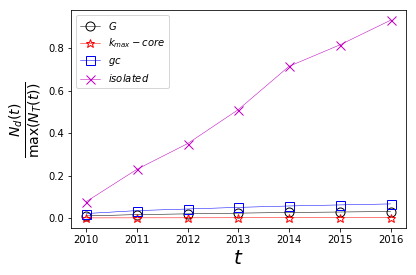

In [27]:
plt.plot(keys,[x/float(max(list(list(zip(*dict_graph_neuron.values()))[0]))) for x in list(list(zip(*dict_graph_neuron.values()))[1])],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[x/float(max(list(list(zip(*dict_main_core_neuron.values()))[0]))) for x in list(list(zip(*dict_main_core_neuron.values()))[1])],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[x/float(max(list(list(zip(*dict_giant_neuron.values()))[0]))) for x in list(list(zip(*dict_giant_neuron.values()))[1])],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[x/float(max(list(list(zip(*dict_isolated_neuron.values()))[0]))) for x in list(list(zip(*dict_isolated_neuron.values()))[1])],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\frac{N_d(t)}{\max(N_T(t))}$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('Ndvst_neuron.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

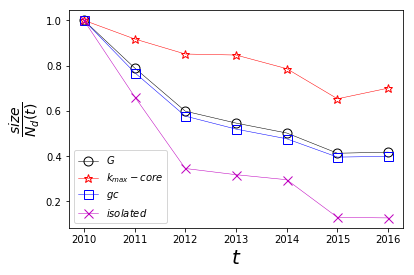

In [28]:
plt.plot(keys,[y/float(x) for x,y in zip(list(list(zip(*dict_graph_neuron.values()))[1]),list(list(zip(*dict_graph_neuron.values()))[2]))],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[y/float(x) for x,y in zip(list(list(zip(*dict_main_core_neuron.values()))[1]),list(list(zip(*dict_main_core_neuron.values()))[2]))],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[y/float(x) for x,y in zip(list(list(zip(*dict_giant_neuron.values()))[1]),list(list(zip(*dict_giant_neuron.values()))[2]))],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[y/float(x) for x,y in zip(list(list(zip(*dict_isolated_neuron.values()))[1]),list(list(zip(*dict_isolated_neuron.values()))[2]))],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\frac{size}{N_d(t)}$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('sizeNdvst_neuron.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

### Palabras nuevas
#### Analizamos para cada división ($k_{max}-core$, $gc$ y $isolated$) la evolución de palabras nuevas, entendidas como palabras que aparecen en un tiempo $t$, y que no están en $t-1$. Nos interesa saber qué proporción de las palabras de una división son nuevas, o dicho de otra forma, en qué región del grafo se introducen las novedades. 

In [29]:
def NnewvsT(decomposition,words_text,graphs): 
    cumulated_words_core=[]
    words_dict_core={}
    
    for k in sorted(decomposition.keys()):
        words=words_text[k]
        core_words=list(decomposition[k].nodes())
        
        words=[item for sublist in words for item in sublist if item in core_words]
        cumulated_words_core_copy=cumulated_words_core.copy()
        cumulated_words_core+=words
        
        total_words=len(cumulated_words_core)
        total_diff=len(list(set(cumulated_words_core)))
        total_new=len(list(set(cumulated_words_core)-set(cumulated_words_core_copy)))
        
        words_dict_core[k]=[total_words,total_new,total_diff,len(core_words),np.mean(list(dict(nx.average_neighbor_degree(graphs[k],nodes=decomposition[k].nodes(),weight='weight')).values())),sum(dict(nx.degree(decomposition[k],weight='weight')).values())/float(len(decomposition[k].nodes))]
    
    return words_dict_core

In [30]:
dict_graph_new_cell=NnewvsT(graphs_cell, text_cell, graphs_cell)

In [31]:
dict_graph_new_neuron=NnewvsT(graphs_neuron, text_neuron, graphs_neuron)

In [32]:
dict_main_core_new_cell=NnewvsT(main_core_cell, text_cell, graphs_cell)

In [33]:
dict_main_core_new_neuron=NnewvsT(main_core_neuron, text_neuron, graphs_neuron)

In [34]:
dict_giant_new_cell=NnewvsT(giant_cell, text_cell, graphs_cell)

In [35]:
dict_giant_new_neuron=NnewvsT(giant_neuron, text_neuron, graphs_neuron)

In [36]:
dict_isolated_new_cell=NnewvsT(isolated_cell, text_cell, graphs_cell)

In [37]:
dict_isolated_new_neuron=NnewvsT(isolated_neuron, text_neuron, graphs_neuron)

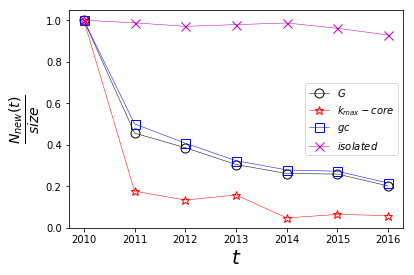

In [38]:
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_graph_new_cell.values()))[1]),list(list(zip(*dict_graph_new_cell.values()))[3]))],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_main_core_new_cell.values()))[1]),list(list(zip(*dict_main_core_new_cell.values()))[3]))],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_giant_new_cell.values()))[1]),list(list(zip(*dict_giant_new_cell.values()))[3]))],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_isolated_new_cell.values()))[1]),list(list(zip(*dict_isolated_new_cell.values()))[3]))],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\frac{N_{new}(t)}{size}$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('newvsNd_cell.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

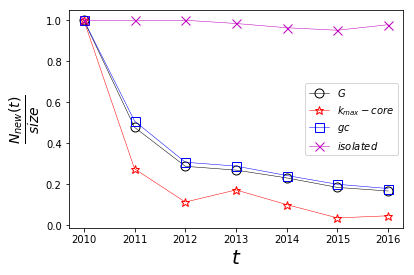

In [39]:
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_graph_new_neuron.values()))[1]),list(list(zip(*dict_graph_new_neuron.values()))[3]))],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_main_core_new_neuron.values()))[1]),list(list(zip(*dict_main_core_new_neuron.values()))[3]))],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_giant_new_neuron.values()))[1]),list(list(zip(*dict_giant_new_neuron.values()))[3]))],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_isolated_new_neuron.values()))[1]),list(list(zip(*dict_isolated_new_neuron.values()))[3]))],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\frac{N_{new}(t)}{size}$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('newvsNd_neuron.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

### Asortatividad y palabras nuevas
#### La asortatividad de un grafo $G$ se define como la correlación entre ciertas medidas entre nodos. Por ejemplo, nos podemos preguntar si los nodos muy conectados, también poseen vecinos muy conectados. Para medir la asortatividad, utilizamos una medida simple: se compara el grado promedio con el grado promedio de los vecinos $k_{nn}$. Intuitivamente, los nodos más externos de $G$ tendrán un valor de $k_{nn}$ mayor. 

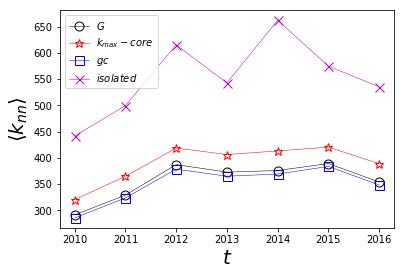

In [40]:
plt.plot(keys,list(list(zip(*dict_graph_new_cell.values()))[4]),'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,list(list(zip(*dict_main_core_new_cell.values()))[4]),'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,list(list(zip(*dict_giant_new_cell.values()))[4]),'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,list(list(zip(*dict_isolated_new_cell.values()))[4]),'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\langle k_{nn} \rangle$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('knn_cell.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

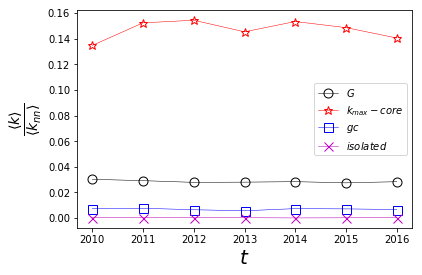

In [41]:
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_graph_new_cell.values()))[5]),list(list(zip(*dict_graph_new_cell.values()))[4]))],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_main_core_new_cell.values()))[5]),list(list(zip(*dict_main_core_new_cell.values()))[4]))],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_giant_new_cell.values()))[5]),list(list(zip(*dict_giant_new_cell.values()))[4]))],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_isolated_new_cell.values()))[5]),list(list(zip(*dict_isolated_new_cell.values()))[4]))],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\frac{\langle k \rangle}{\langle k_{nn} \rangle}$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('k_cell.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

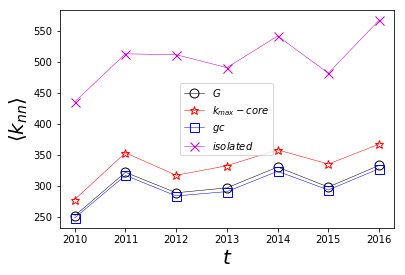

In [42]:
plt.plot(keys,list(list(zip(*dict_graph_new_neuron.values()))[4]),'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,list(list(zip(*dict_main_core_new_neuron.values()))[4]),'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,list(list(zip(*dict_giant_new_neuron.values()))[4]),'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,list(list(zip(*dict_isolated_new_neuron.values()))[4]),'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\langle k_{nn} \rangle$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('knn_neuron.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

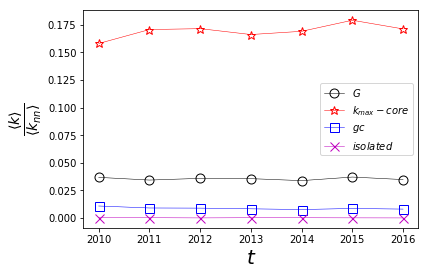

In [43]:
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_graph_new_neuron.values()))[5]),list(list(zip(*dict_graph_new_neuron.values()))[4]))],'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_main_core_new_neuron.values()))[5]),list(list(zip(*dict_main_core_new_neuron.values()))[4]))],'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_giant_new_neuron.values()))[5]),list(list(zip(*dict_giant_new_neuron.values()))[4]))],'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,[x/float(y) for x,y in zip(list(list(zip(*dict_isolated_new_neuron.values()))[5]),list(list(zip(*dict_isolated_new_neuron.values()))[4]))],'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$\frac{\langle k \rangle}{\langle k_{nn} \rangle}$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('k_neuron.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

### Flujo de palabras 
#### Entendemos flujo de palabras para un año en particular como el promedio entre la proporción de palabras que entran (con respecto al año anterior) y la proporción de palabras que salen (con respecto al año siguiente). Se espera medir entonces qué porcentaje de las distintas partes de los grafos ($k_{max}-core$, $gc$ y $isolated$) cambia a través del tiempo. Es natural pensar que capas las más externas del grafo, como $isolated$, tendrán un flujo mayor. 

In [176]:
def NfluxvsT(decomposition): 
    cumulated_words_core=[]
    words_dict_core={}
    D=[int(x) for x in sorted(decomposition.keys())]
    for k in D:
        if k==2010: ## para el 2010 se cuentan las palabras que salen
            decom_k=list(decomposition[str(k)].nodes())
            decom_plus=list(decomposition[str(k+1)].nodes())
        
            total_flux=len(list(set(decom_k)-set(decom_plus)))
        elif k==2016: ## para el 2016 se cuentan las palabras que entran
            decom_minus=list(decomposition[str(k-1)].nodes())
            decom_k=list(decomposition[str(k)].nodes())
        
            total_flux=len(list(set(decom_k)-set(decom_minus)))
        else: ## para el resto de los años, palabras que salen y entran
            decom_minus=list(decomposition[str(k-1)].nodes())
            decom_k=list(decomposition[str(k)].nodes())
            decom_plus=list(decomposition[str(k+1)].nodes())
        
            total_flux=np.mean([len(list(set(decom_k)-set(decom_minus))),len(list(set(decom_k)-set(decom_plus)))])
        
        words_dict_core[k]=[total_flux/float(len(list(set(decom_k))))]
    
    return words_dict_core

In [170]:
flow_graph_cell=list(zip(*NfluxvsT(graphs_cell).values()))[0]

In [171]:
keys=[int(k) for k in keys_doi]

In [172]:
flow_main_core_cell=list(zip(*NfluxvsT(main_core_cell).values()))[0]

In [173]:
flow_giant_cell=list(zip(*NfluxvsT(giant_cell).values()))[0]

In [174]:
flow_isolated_cell=list(zip(*NfluxvsT(isolated_cell).values()))[0]

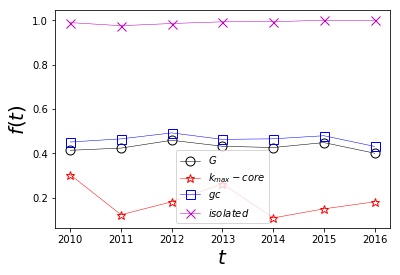

In [183]:
plt.plot(keys,flow_graph_cell,'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,flow_main_core_cell,'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,flow_giant_cell,'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,flow_isolated_cell,'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$f(t)$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('flow_cell.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()

In [177]:
flow_graph_neuron=list(zip(*NfluxvsT(graphs_neuron).values()))[0]

In [178]:
flow_main_core_neuron=list(zip(*NfluxvsT(main_core_neuron).values()))[0]

In [179]:
flow_giant_neuron=list(zip(*NfluxvsT(giant_neuron).values()))[0]

In [180]:
flow_isolated_neuron=list(zip(*NfluxvsT(isolated_neuron).values()))[0]

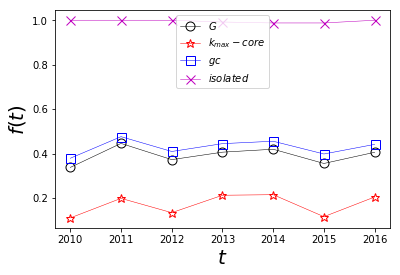

In [182]:
plt.plot(keys,flow_graph_neuron,'k',marker='o',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$G$')
plt.plot(keys,flow_main_core_neuron,'r',marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$k_{max}-core$')
plt.plot(keys,flow_giant_neuron,'b',marker='s',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$gc$')
plt.plot(keys,flow_isolated_neuron,'m',marker='x',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False,linewidth=0.5,label=r'$isolated$')

plt.legend(loc='best')
plt.ylabel(r'$f(t)$',fontsize=20)
plt.xlabel(r'$t$',fontsize=20)
plt.rcParams.update({'font.size': 10})
plt.savefig('flow_neuron.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1000)
plt.show()